An _ab initio_ PES was give by [_Polyansky et al, 2013_](https://pubs.acs.org/doi/10.1021/jp312343z).
They write the PES in terms of a `Fortran` script, provided in the [supporting information](https://pubs.acs.org/doi/suppl/10.1021/jp312343z/suppl_file/jp312343z_si_001.txt).

In [8]:
import jax
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_debug_nans", True)
import jax.numpy as jnp
from jax.example_libraries.stax import Dense, Relu, serial
import pandas as pd
import optax

In [34]:
def water_pes_(r1, r2, th):
    reoh = 0.96
    thetae = 104.3475 * jnp.pi / 180
    b1 = 2.15
    roh = 0.951961
    # alphaoh = 0.0
    phh2 = 6.20164303995
    # t0 = 0.01
    # ut = 20
    # x0 = 2.5
    # ut2 = 20
    # x02 = 2.5
    alpha  =  2.2668

    xs1 = (r1+r2) * 0.5 - reoh
    xs2 = (r1-r2) * 0.5
    xst = jnp.cos(th) - jnp.cos(thetae)

    rr1 = r1 - reoh
    rr2 = r2 - reoh

    xep1 = (jnp.exp(-2 * alpha * rr1) - 2 * jnp.exp(-alpha * rr1)) * \
        ( 0.4389830771267e+05 \
        - 0.8606164763375e+03 * rr1 \
        + 0.1746549380317e+05 * rr1 ** 2 \
        - 0.3326053761996e+05 * rr1 ** 3 \
        + 0.4988743744461e+04 * rr1 ** 4 \
        + 0.8751979626215e+04 * rr1 ** 5 \
        - 0.3770596827415e+04 * rr1 ** 6 \
        + 0.4270854122634e+03 * rr1 ** 7 ) + 0.4389830771267e+05
    
    xep2 = (jnp.exp(-2 * alpha * rr2) - 2 * jnp.exp(-alpha * rr2)) * \
        ( 0.4389830771267e+05 \
        - 0.8606164763375e+03 * rr2 \
        + 0.1746549380317e+05 * rr2 ** 2 \
        - 0.3326053761996e+05 * rr2 ** 3 \
        + 0.4988743744461e+04 * rr2 ** 4 \
        + 0.8751979626215e+04 * rr2 ** 5 \
        - 0.3770596827415e+04 * rr2 ** 6 \
        + 0.4270854122634e+03 * rr2 ** 7 ) + 0.4389830771267e+05
    
    xep3 = jnp.exp(-b1 * ((r1-roh) ** 2 + (r2-roh) ** 2))
    rhh = jnp.sqrt(r1 ** 2 + r2 ** 2 - 2 * r1 * r2 * jnp.cos(th))
    vhh = 0.820894739261131734e+06 * jnp.exp(-phh2 * rhh)

    v0 = -0.6509829883671e+02

    vp1 = -0.2440078850053E+03*xs1**0*xs2**0*xst**1 \
     +0.850470449554E+03*xs1**1*xs2**0*xst**0 \
     +0.163103846628E+05*xs1**0*xs2**0*xst**2 \
     +0.969978250786E+04*xs1**0*xs2**2*xst**0 \
     -0.245696189839E+05*xs1**1*xs2**0*xst**1 \
     -0.479560118568E+04*xs1**2*xs2**0*xst**0 \
     +0.745907893972E+03*xs1**0*xs2**0*xst**3 \
     -0.203648962314E+05*xs1**0*xs2**2*xst**1 \
     -0.838987283031E+04*xs1**1*xs2**0*xst**2 \
     -0.160705349689E+05*xs1**1*xs2**2*xst**0 \
     +0.190770432142E+05*xs1**2*xs2**0*xst**1 \
     +0.364151710980E+04*xs1**3*xs2**0*xst**0 \
     +0.299103961691E+04*xs1**0*xs2**0*xst**4 \
     +0.610837056837E+05*xs1**0*xs2**2*xst**2 \
     +0.852404840509E+04*xs1**0*xs2**4*xst**0 \
     -0.750204783582E+04*xs1**1*xs2**0*xst**3 \
     -0.249104833853E+05*xs1**1*xs2**2*xst**1 \
     +0.644088815734E+05*xs1**2*xs2**0*xst**2 \
     -0.175149109253E+06*xs1**2*xs2**2*xst**0 \
     -0.668630959692E+05*xs1**3*xs2**0*xst**1 \
     -0.863068212550E+05*xs1**4*xs2**0*xst**0 \
     -0.720232613172E+03*xs1**0*xs2**0*xst**5 \
     -0.618509164744E+04*xs1**0*xs2**2*xst**3 \
     -0.461421927539E+05*xs1**0*xs2**4*xst**1 \
     +0.852376338345E+04*xs1**1*xs2**0*xst**4 \
     -0.236197879186E+05*xs1**1*xs2**2*xst**2 \
     +0.332913081123E+06*xs1**1*xs2**4*xst**0 \
     -0.258430968853E+05*xs1**2*xs2**0*xst**3 \
     -0.189145830539E+05*xs1**2*xs2**2*xst**1 \
     +0.263660013465E+05*xs1**3*xs2**0*xst**2 \
     +0.774183891348E+06*xs1**3*xs2**2*xst**0 \
     +0.370825986540E+05*xs1**4*xs2**0*xst**1 \
     +0.176870326749E+06*xs1**5*xs2**0*xst**0 \
     +0.102097133566E+04*xs1**0*xs2**0*xst**6 \
     +0.388760256520E+05*xs1**0*xs2**2*xst**4 \
     +0.130363612118E+06*xs1**0*xs2**4*xst**2 \
     +0.574108070242E+05*xs1**0*xs2**6*xst**0 \
     -0.112127292899E+05*xs1**1*xs2**0*xst**5 \
     -0.827525819733E+05*xs1**1*xs2**2*xst**3 \
     -0.824685968289E+05*xs1**1*xs2**4*xst**1 \
     +0.390877138542E+05*xs1**2*xs2**0*xst**4 \
     +0.272170285230E+06*xs1**2*xs2**2*xst**2 \
     -0.655024895868E+06*xs1**2*xs2**4*xst**0 \
     +0.130728478114E+05*xs1**3*xs2**0*xst**3 \
     -0.313702829903E+06*xs1**3*xs2**2*xst**1 \
     -0.210847389037E+05*xs1**4*xs2**0*xst**2 \
     -0.662582981914E+06*xs1**4*xs2**2*xst**0 \
     -0.121162769812E+06*xs1**5*xs2**0*xst**1 \
     -0.211968635514E+06*xs1**6*xs2**0*xst**0 \
     +0.446589655534E+03*xs1**0*xs2**0*xst**7 \
     +0.106282879914E+05*xs1**0*xs2**2*xst**5 \
     -0.286472414713E+05*xs1**0*xs2**4*xst**3 \
     -0.759557508754E+05*xs1**0*xs2**6*xst**1 \
     +0.148686315032E+04*xs1**1*xs2**0*xst**6 \
     -0.200546148662E+06*xs1**1*xs2**2*xst**4 \
     -0.944883110366E+05*xs1**1*xs2**4*xst**2 \
     -0.125232816426E+04*xs1**1*xs2**6*xst**0
    
    vp2 = 0.179274616671E+05*xs1**2*xs2**0*xst**5 \
     +0.168675960247E+06*xs1**2*xs2**2*xst**3 \
     -0.278915521285E+05*xs1**2*xs2**4*xst**1 \
     -0.122742032352E+06*xs1**3*xs2**0*xst**4 \
     -0.368691511409E+06*xs1**3*xs2**2*xst**2 \
     -0.316575488524E+06*xs1**3*xs2**4*xst**0 \
     -0.105521069935E+06*xs1**4*xs2**0*xst**3 \
     +0.316230271588E+06*xs1**4*xs2**2*xst**1 \
     +0.590821539604E+04*xs1**5*xs2**0*xst**2 \
     -0.204432438018E+06*xs1**5*xs2**2*xst**0 \
     -0.106085437583E+06*xs1**6*xs2**0*xst**1 \
     -0.108345695171E+06*xs1**7*xs2**0*xst**0 \
     -0.679178854682E+03*xs1**0*xs2**0*xst**8 \
     -0.276120951148E+05*xs1**0*xs2**2*xst**6 \
     +0.152783582977E+06*xs1**0*xs2**4*xst**4 \
     -0.150150932713E+06*xs1**0*xs2**6*xst**2 \
     +0.820345007448E+05*xs1**0*xs2**8*xst**0 \
     +0.176354590590E+05*xs1**1*xs2**0*xst**7 \
     +0.701539155947E+05*xs1**1*xs2**2*xst**5 \
     -0.966823832273E+05*xs1**1*xs2**4*xst**3 \
     +0.149915969207E+06*xs1**1*xs2**6*xst**1 \
     -0.101771349188E+06*xs1**2*xs2**0*xst**6 \
     +0.455684736491E+06*xs1**2*xs2**2*xst**4 \
     +0.191067335255E+06*xs1**2*xs2**4*xst**2 \
     +0.510594979959E+05*xs1**2*xs2**6*xst**0 \
     +0.911417922236E+05*xs1**3*xs2**0*xst**5 \
     -0.112204762807E+05*xs1**3*xs2**2*xst**3 \
     +0.381039343951E+06*xs1**3*xs2**4*xst**1 \
     +0.212829050152E+06*xs1**4*xs2**0*xst**4 \
     +0.213116260130E+06*xs1**4*xs2**2*xst**2 \
     +0.426243606864E+05*xs1**4*xs2**4*xst**0 \
     +0.200575488613E+06*xs1**5*xs2**0*xst**3 \
     +0.171130447357E+06*xs1**5*xs2**2*xst**1 \
     +0.136135680783E+06*xs1**6*xs2**0*xst**2 \
     +0.979399706635E+05*xs1**6*xs2**2*xst**0 \
     +0.324796467575E+06*xs1**7*xs2**0*xst**1 \
     +0.104268959687E+06*xs1**8*xs2**0*xst**0 \
     -0.135485031864E+04*xs1**0*xs2**0*xst**9 \
     -0.152017297934E+05*xs1**0*xs2**2*xst**7 \
     -0.106742109193E+06*xs1**0*xs2**4*xst**5 \
     +0.103973946513E+06*xs1**0*xs2**6*xst**3 \
     +0.399205311097E+05*xs1**0*xs2**8*xst**1 \
     +0.293879380377E+04*xs1**1*xs2**0*xst**8 \
     +0.492364716431E+06*xs1**1*xs2**2*xst**6 \
     -0.601236088748E+04*xs1**1*xs2**4*xst**4 \
     +0.844714562028E+05*xs1**1*xs2**6*xst**2 \
     +0.567615421422E+05*xs1**1*xs2**8*xst**0 \
     -0.517609929883E+05*xs1**2*xs2**0*xst**7 \
     -0.467044067857E+06*xs1**2*xs2**2*xst**5 \
     +0.178294381722E+06*xs1**2*xs2**4*xst**3 \
     +0.131315561651E+06*xs1**2*xs2**6*xst**1 \
     +0.277288687397E+06*xs1**3*xs2**0*xst**6 \
     -0.173584883531E+06*xs1**3*xs2**2*xst**4 \
     +0.168510182461E+06*xs1**3*xs2**4*xst**2 \
     +0.579757582004E+05*xs1**3*xs2**6*xst**0 \
     -0.227927939760E+06*xs1**4*xs2**0*xst**5 \
     +0.122147150093E+06*xs1**4*xs2**2*xst**3 \
     +0.203575087440E+06*xs1**4*xs2**4*xst**1 \
     +0.440830338242E+05*xs1**5*xs2**0*xst**4 \
     +0.184692416903E+06*xs1**5*xs2**2*xst**2 \
     +0.721707020842E+05*xs1**5*xs2**4*xst**0 \
     +0.874181339104E+05*xs1**6*xs2**0*xst**3 \
     +0.145139421834E+06*xs1**6*xs2**2*xst**1
    
    vp3 = 0.128728889235E+06*xs1**7*xs2**0*xst**2 \
     +0.728378762068E+05*xs1**7*xs2**2*xst**0 \
     +0.129051677521E+06*xs1**8*xs2**0*xst**1 \
     +0.625846347829E+05*xs1**9*xs2**0*xst**0 \
     +0.616818822522E+05*xs1**0*xs2**2*xst**8 \
     -0.810588541637E+05*xs1**0*xs2**4*xst**6 \
     +0.591621487820E+04*xs1**0*xs2**6*xst**4 \
     +0.227438626305E+05*xs1**0*xs2**8*xst**2 \
     -0.203261590788E+05*xs1**1*xs2**0*xst**9 \
     -0.299680898168E+06*xs1**1*xs2**2*xst**7 \
     -0.222846365783E+05*xs1**1*xs2**4*xst**5 \
     +0.293823925499E+05*xs1**1*xs2**6*xst**3 \
     +0.252005915289E+05*xs1**1*xs2**8*xst**1 \
     +0.146548643264E+06*xs1**2*xs2**0*xst**8 \
     +0.787863306712E+05*xs1**2*xs2**2*xst**6 \
     -0.193115260054E+05*xs1**2*xs2**4*xst**4 \
     +0.383411415857E+05*xs1**2*xs2**6*xst**2 \
     -0.299862084967E+06*xs1**3*xs2**0*xst**7 \
     -0.298540023288E+05*xs1**3*xs2**2*xst**5 \
     +0.639847194086E+05*xs1**3*xs2**4*xst**3 \
     +0.423096170923E+05*xs1**3*xs2**6*xst**1 \
     -0.479205139137E+05*xs1**4*xs2**0*xst**6 \
     -0.880725580387E+05*xs1**4*xs2**2*xst**4 \
     +0.630591285422E+05*xs1**4*xs2**4*xst**2 \
     -0.725987844884E+05*xs1**5*xs2**0*xst**5 \
     +0.389079560156E+05*xs1**5*xs2**2*xst**3 \
     +0.546989982246E+05*xs1**5*xs2**4*xst**1 \
     +0.758775980558E+05*xs1**6*xs2**0*xst**4 \
     +0.644877193979E+05*xs1**6*xs2**2*xst**2 \
     +0.387261663573E+05*xs1**6*xs2**4*xst**0 \
     +0.601998997250E+05*xs1**7*xs2**0*xst**3 \
     +0.339285850943E+05*xs1**7*xs2**2*xst**1 \
     +0.770789462592E+05*xs1**8*xs2**0*xst**2 \
     +0.286325374037E+05*xs1**8*xs2**2*xst**0 \
     +0.730443330117E+05*xs1**9*xs2**0*xst**1 \
     +0.329740820429E+05*xs1**10*xs2**0*xst**0 \
     +0.342043529176E+04*xs1**0*xs2**2*xst**9 \
     -0.637451131612E+05*xs1**0*xs2**4*xst**7 \
     +0.189143707707E+05*xs1**0*xs2**6*xst**5 \
     +0.145714903728E+05*xs1**0*xs2**8*xst**3 \
     +0.111114788607E+05*xs1**0*xs2**10*xst**1 \
     +0.589478507862E+04*xs1**1*xs2**0*xst**10 \
     -0.181213967265E+06*xs1**1*xs2**2*xst**8 \
     -0.144750093411E+05*xs1**1*xs2**4*xst**6 \
     -0.608180462843E+02*xs1**1*xs2**6*xst**4 \
     +0.117083908242E+05*xs1**1*xs2**8*xst**2 \
     +0.339291338083E+04*xs1**1*xs2**10*xst**0 \
     -0.478722460382E+05*xs1**2*xs2**0*xst**9 \
     +0.825337067800E+04*xs1**2*xs2**2*xst**7 \
     +0.696301852439E+04*xs1**2*xs2**4*xst**5 \
     +0.182110999777E+05*xs1**2*xs2**6*xst**3 \
     +0.110563870456E+05*xs1**2*xs2**8*xst**1 \
     +0.552769690767E+05*xs1**3*xs2**0*xst**8 \
     -0.646204339796E+05*xs1**3*xs2**2*xst**6 \
     -0.323569851788E+04*xs1**3*xs2**4*xst**4 \
     +0.160938586852E+05*xs1**3*xs2**6*xst**2 \
     +0.446652239191E+04*xs1**3*xs2**8*xst**0 \
     -0.682474473688E+04*xs1**4*xs2**0*xst**7 \
     -0.391179819479E+05*xs1**4*xs2**2*xst**5 \
     +0.203289006704E+05*xs1**4*xs2**4*xst**3 \
     +0.120702404886E+05*xs1**4*xs2**6*xst**1 \
     +0.144136280200E+04*xs1**5*xs2**0*xst**6 \
     -0.368194765933E+05*xs1**5*xs2**2*xst**4 \
     +0.225671263499E+05*xs1**5*xs2**4*xst**2 \
     +0.103604961115E+05*xs1**5*xs2**6*xst**0 \
     +0.244733779186E+05*xs1**6*xs2**0*xst**5 \
     -0.733579749628E+04*xs1**6*xs2**2*xst**3 \
     +0.132636493412E+05*xs1**6*xs2**4*xst**1
    
    vp4 = 0.609915439938E+05*xs1**7*xs2**0*xst**4  \
     +0.161789547847E+05*xs1**7*xs2**2*xst**2  \
     +0.418773248010E+05*xs1**8*xs2**0*xst**3  \
     -0.140348508872E+04*xs1**8*xs2**2*xst**1  \
     +0.254045256956E+05*xs1**9*xs2**0*xst**2  \
     +0.105922382968E+05*xs1**9*xs2**2*xst**0  \
     +0.297477797791E+05*xs1**10*xs2**0*xst**1 \
     +0.232054156663E+05*xs1**11*xs2**0*xst**0 \
     +0.200458040862E+04*xs1**0*xs2**0*xst**12 \
     -0.902761294814E+03*xs1**0*xs2**2*xst**10 \
     -0.901559889451E+05*xs1**0*xs2**4*xst**8  \
     -0.320244992406E+04*xs1**0*xs2**6*xst**6  \
     +0.590925446376E+04*xs1**0*xs2**8*xst**4  \
     +0.874909607958E+04*xs1**0*xs2**10*xst**2 \
     +0.566860290291E+04*xs1**0*xs2**12*xst**0 \
     +0.406048691067E+04*xs1**1*xs2**0*xst**11 \
     +0.616041719759E+05*xs1**1*xs2**2*xst**9  \
     -0.219063437111E+05*xs1**1*xs2**4*xst**7  \
     +0.185308904958E+04*xs1**1*xs2**6*xst**5  \
     +0.657292600336E+04*xs1**1*xs2**8*xst**3  \
     +0.367060226775E+04*xs1**1*xs2**10*xst**1 \
     -0.363331619293E+05*xs1**2*xs2**0*xst**10 \
     +0.251925184556E+06*xs1**2*xs2**2*xst**8  \
     -0.127029842215E+05*xs1**2*xs2**4*xst**6  \
     +0.271008375022E+04*xs1**2*xs2**6*xst**4  \
     +0.780618004964E+04*xs1**2*xs2**8*xst**2  \
     +0.246161145385E+04*xs1**2*xs2**10*xst**0 \
     +0.980466986668E+05*xs1**3*xs2**0*xst**9  \
     +0.345844255629E+05*xs1**3*xs2**2*xst**7  \
     +0.397113986526E+04*xs1**3*xs2**4*xst**5  \
     +0.987093141079E+04*xs1**3*xs2**6*xst**3  \
     +0.418408273730E+04*xs1**3*xs2**8*xst**1  \
     -0.358553823857E+05*xs1**4*xs2**0*xst**8  \
     -0.434505880934E+05*xs1**4*xs2**2*xst**6  \
     +0.309634857521E+04*xs1**4*xs2**4*xst**4  \
     +0.979254834560E+04*xs1**4*xs2**6*xst**2  \
     +0.359157680026E+04*xs1**4*xs2**8*xst**0  \
     -0.171526343212E+05*xs1**5*xs2**0*xst**7  \
     -0.215657784659E+05*xs1**5*xs2**2*xst**5  \
     +0.934206242624E+04*xs1**5*xs2**4*xst**3  \
     +0.560702013494E+04*xs1**5*xs2**6*xst**1  \
     +0.344829060818E+05*xs1**6*xs2**0*xst**6  \
     -0.101998260783E+05*xs1**6*xs2**2*xst**4  \
     +0.953486025504E+04*xs1**6*xs2**4*xst**2  \
     +0.627259097595E+04*xs1**6*xs2**6*xst**0  \
     +0.282763321724E+05*xs1**7*xs2**0*xst**5  \
     -0.370360425928E+04*xs1**7*xs2**2*xst**3  \
     +0.547112678564E+04*xs1**7*xs2**4*xst**1  \
     +0.366645080016E+05*xs1**8*xs2**0*xst**4  \
     +0.751695477539E+04*xs1**8*xs2**2*xst**2  \
     +0.668965892522E+04*xs1**8*xs2**4*xst**0  \
     +0.207736591997E+05*xs1**9*xs2**0*xst**3  \
     -0.509962388328E+02*xs1**9*xs2**2*xst**1  \
     +0.130899143121E+05*xs1**10*xs2**0*xst**2 \
     +0.439929175790E+04*xs1**10*xs2**2*xst**0 \
     +0.142979914736E+05*xs1**11*xs2**0*xst**1 \
     +0.114659570321E+05*xs1**12*xs2**0*xst**0
    
    vp = vp1 + vp2 + vp3 + vp4

    v = v0 + vp * xep3 + vhh + xep1 + xep2
    return v

def water_pes(input):
    return water_pes_(*input)
batch_water_pes = jax.vmap(water_pes)

In [49]:
N = 180
theta_vary = jnp.array([[0.95, 0.95, jnp.pi * n / N] for n in range(N)])
theta_energy = batch_water_pes(theta_vary)

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_2971/3473999135.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


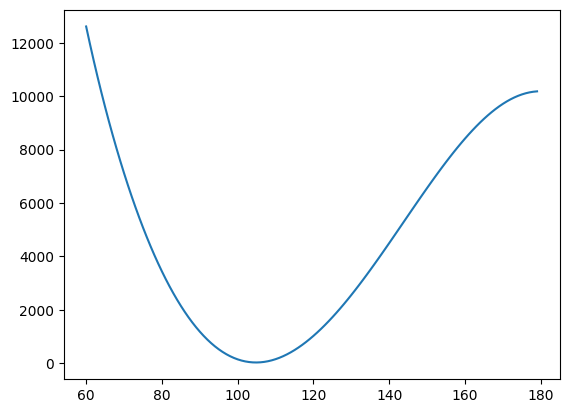

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(60, N), theta_energy[60:N])
fig.show()

In [48]:
nn = jnp.argmin(theta_energy)
180 * nn / N

Array(105., dtype=float64)